In [1]:
# Student Performance - Easy Exploratory Data Analysis (EDA)
# This notebook explores student academic achievement data step by step

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("📊 STUDENT PERFORMANCE - EASY EDA ANALYSIS")
print("=" * 50)
print("This notebook explores what makes students successful!")

📊 STUDENT PERFORMANCE - EASY EDA ANALYSIS
This notebook explores what makes students successful!


In [2]:
# Step 1: Load the Data
print("📁 STEP 1: LOADING STUDENT DATA")
print("-" * 30)

# Load the clean dataset
df = pd.read_csv('../data/Student_Performance_CLEAN.csv')

print(f"✅ Data loaded successfully!")
print(f"📊 We have {df.shape[0]} students and {df.shape[1]} features")
print(f"🎯 Our goal: Understand what helps students get good exam scores!")

📁 STEP 1: LOADING STUDENT DATA
------------------------------
✅ Data loaded successfully!
📊 We have 6378 students and 20 features
🎯 Our goal: Understand what helps students get good exam scores!


In [3]:
# Step 2: Look at the Data Structure
print("🔍 STEP 2: WHAT'S IN OUR DATA?")
print("-" * 35)

print("📋 First 5 students:")
print(df.head())

print(f"\n📊 Data Summary:")
print(f"   • Students: {df.shape[0]:,}")
print(f"   • Features: {df.shape[1]}")
print(f"   • Missing data: {df.isnull().sum().sum()} (Perfect!)")

print(f"\n📈 Exam Score Facts:")
print(f"   • Highest score: {df['Exam_Score'].max()}")
print(f"   • Lowest score: {df['Exam_Score'].min()}")
print(f"   • Average score: {df['Exam_Score'].mean():.1f}")

🔍 STEP 2: WHAT'S IN OUR DATA?
-----------------------------------
📋 First 5 students:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   



In [4]:
# Step 3: Simple Data Overview
print("📈 STEP 3: SIMPLE DATA OVERVIEW")
print("-" * 35)

# Show basic info about each column
print("📋 What each column tells us:")
columns_info = {
    'Hours_Studied': 'How many hours per week student studies',
    'Attendance': 'Percentage of classes attended',
    'Parental_Involvement': 'How much parents help with school',
    'Access_to_Resources': 'Does student have books, internet, etc.',
    'Extracurricular_Activities': 'Sports, clubs, music, etc.',
    'Sleep_Hours': 'Hours of sleep per night',
    'Previous_Scores': 'Past exam scores',
    'Motivation_Level': 'How motivated the student is',
    'Internet_Access': 'Has internet at home',
    'Tutoring_Sessions': 'Extra help sessions per month',
    'Family_Income': 'Family economic status',
    'Teacher_Quality': 'Quality of teachers',
    'School_Type': 'Public or Private school',
    'Peer_Influence': 'Impact of friends on studies',
    'Physical_Activity': 'Exercise hours per week',
    'Learning_Disabilities': 'Has learning challenges',
    'Parental_Education_Level': 'Parents education background',
    'Distance_from_Home': 'How far is school',
    'Gender': 'Male or Female',
    'Exam_Score': 'The score we want to predict!'
}

for col, description in columns_info.items():
    if col in df.columns:
        print(f"   • {col}: {description}")

📈 STEP 3: SIMPLE DATA OVERVIEW
-----------------------------------
📋 What each column tells us:
   • Hours_Studied: How many hours per week student studies
   • Attendance: Percentage of classes attended
   • Parental_Involvement: How much parents help with school
   • Access_to_Resources: Does student have books, internet, etc.
   • Extracurricular_Activities: Sports, clubs, music, etc.
   • Sleep_Hours: Hours of sleep per night
   • Previous_Scores: Past exam scores
   • Motivation_Level: How motivated the student is
   • Internet_Access: Has internet at home
   • Tutoring_Sessions: Extra help sessions per month
   • Family_Income: Family economic status
   • Teacher_Quality: Quality of teachers
   • School_Type: Public or Private school
   • Peer_Influence: Impact of friends on studies
   • Physical_Activity: Exercise hours per week
   • Learning_Disabilities: Has learning challenges
   • Parental_Education_Level: Parents education background
   • Distance_from_Home: How far is scho

🎯 STEP 4: UNDERSTANDING EXAM SCORES
----------------------------------------
📊 Exam Score Statistics:
   • Average: 67.3 points
   • Range: 55 to 101 points
   • Most students score between 65 and 69


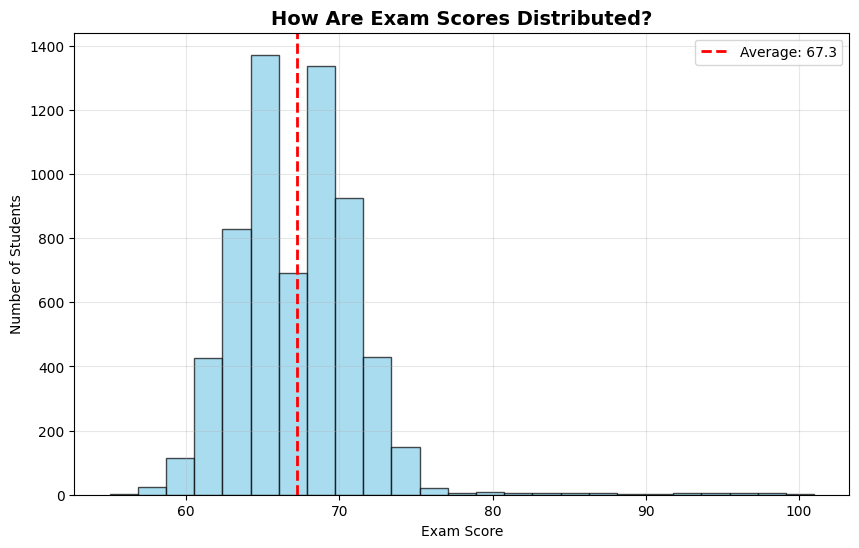


💡 What this tells us:
   • Most students score around 67 points
   • Very few students get extremely high or low scores
   • The distribution looks fairly normal (bell-shaped)


In [ ]:
# Step 4: Look at Exam Scores (Our Target)
print("🎯 STEP 4: UNDERSTANDING EXAM SCORES")
print("-" * 40)

# Basic statistics
print(f"📊 Exam Score Statistics:")
print(f"   • Average: {df['Exam_Score'].mean():.1f} points")
print(f"   • Range: {df['Exam_Score'].min()} to {df['Exam_Score'].max()} points")
print(f"   • Most students score between {df['Exam_Score'].quantile(0.25):.0f} and {df['Exam_Score'].quantile(0.75):.0f}")

# Simple visualization
plt.figure(figsize=(10, 6))
plt.hist(df['Exam_Score'], bins=25, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(df['Exam_Score'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Average: {df["Exam_Score"].mean():.1f}')
plt.title('How Are Exam Scores Distributed?', fontsize=14, fontweight='bold')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n💡 What this tells us:")
print(f"   • Most students score around {df['Exam_Score'].mean():.0f} points")
print(f"   • Very few students get extremely high or low scores")
print(f"   • The distribution looks fairly normal (bell-shaped)")

In [ ]:
# Step 5: What Factors Affect Exam Scores? (Correlation Analysis)
print("🔍 STEP 5: WHAT AFFECTS EXAM SCORES?")
print("-" * 40)

# Find which factors are most related to exam scores
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_columns].corr()['Exam_Score'].sort_values(ascending=False)

print("🏆 TOP 10 FACTORS THAT AFFECT EXAM SCORES:")
print("(1.0 = perfect relationship, 0 = no relationship)")
print("-" * 50)

count = 1
for factor, correlation in correlations.items():
    if factor != 'Exam_Score' and count <= 10:  # Skip exam score itself
        if correlation > 0.5:
            strength = "Very Strong 💪"
        elif correlation > 0.3:
            strength = "Moderate 👍"
        elif correlation > 0.1:
            strength = "Weak 👌"
        else:
            strength = "Very Weak 🤷"

        print(f"{count:2d}. {factor:<25} {correlation:+.3f} ({strength})")
        count += 1

print(f"\n💡 Key Insights:")
top_factor = correlations.drop('Exam_Score').index[0]
print(f"   • {top_factor} has the strongest relationship with exam scores!")
print(f"   • Correlation of {correlations[top_factor]:.3f} means they're closely connected")

🔍 STEP 5: WHAT AFFECTS EXAM SCORES?
----------------------------------------
🏆 TOP 10 FACTORS THAT AFFECT EXAM SCORES:
(1.0 = perfect relationship, 0 = no relationship)
--------------------------------------------------
 1. Attendance                +0.580 (Very Strong 💪)
 2. Hours_Studied             +0.445 (Moderate 👍)
 3. Previous_Scores           +0.174 (Weak 👌)
 4. Tutoring_Sessions         +0.157 (Weak 👌)
 5. Physical_Activity         +0.025 (Very Weak 🤷)
 6. Sleep_Hours               -0.017 (Very Weak 🤷)

💡 Key Insights:
   • Attendance has the strongest relationship with exam scores!
   • Correlation of 0.580 means they're closely connected


📈 STEP 6: VISUALIZING KEY RELATIONSHIPS
---------------------------------------------


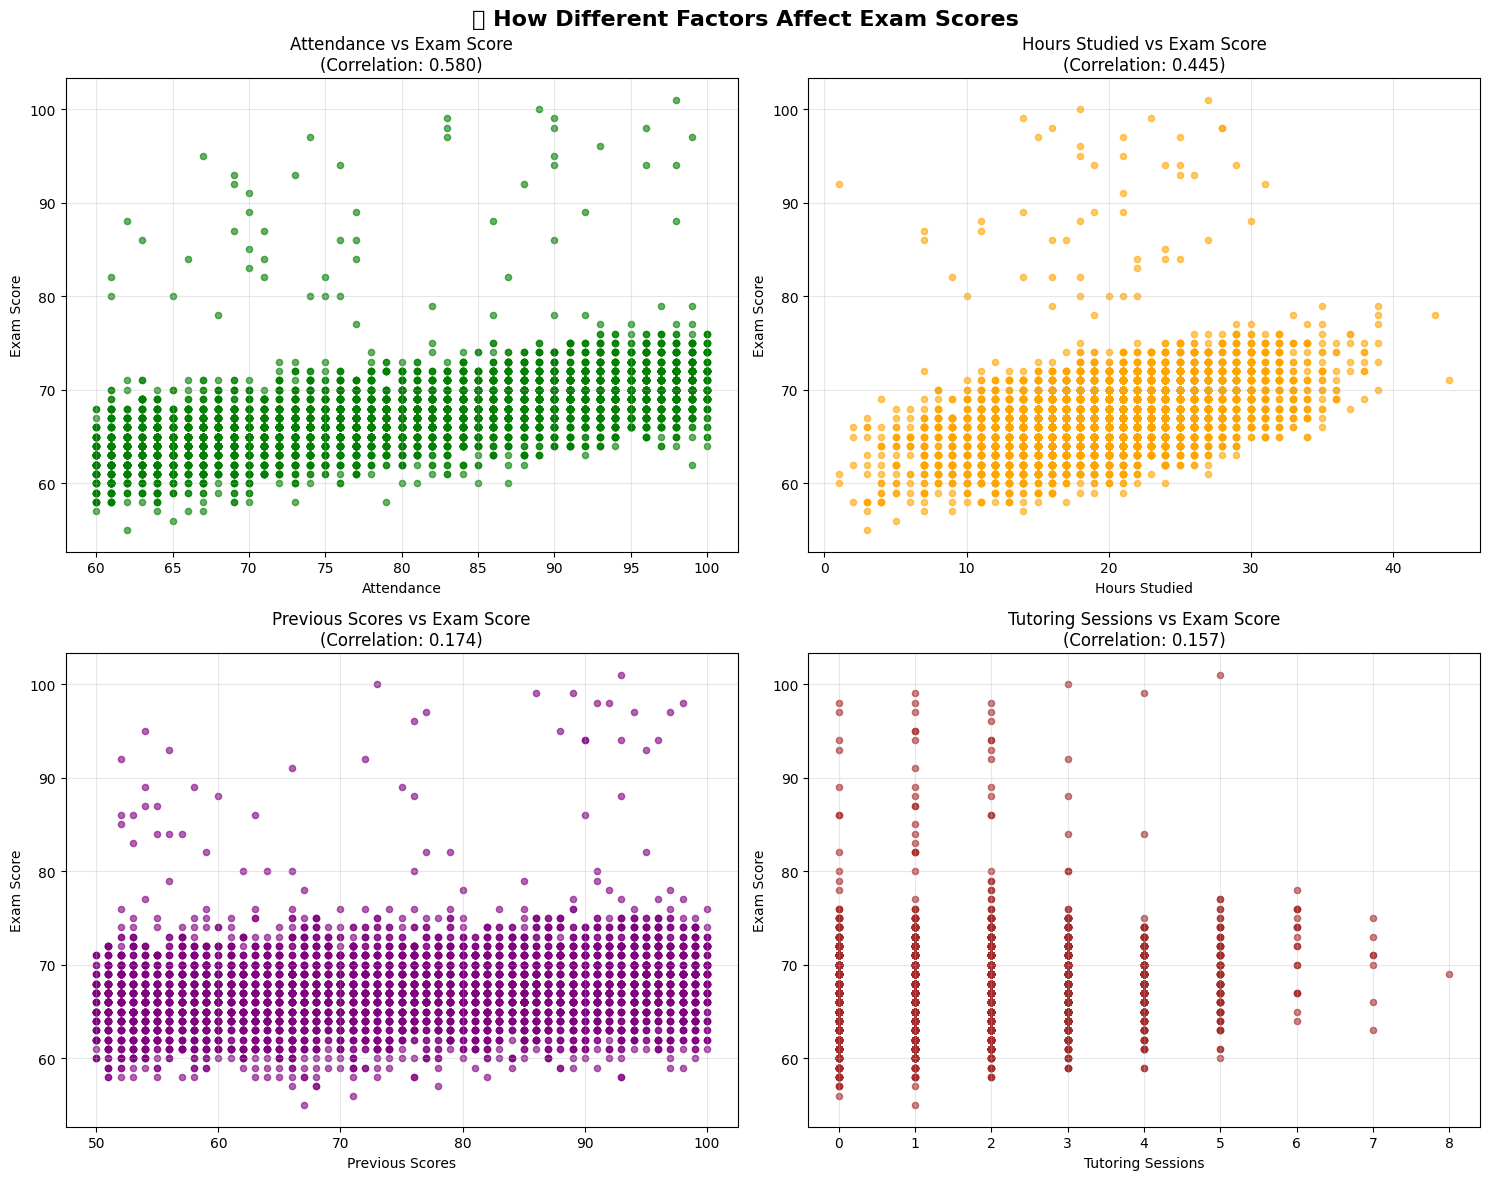

💡 What the scatter plots show:
   • Points going up and right = positive relationship
   • Tighter clusters = stronger relationship
   • Scattered points = weaker relationship


In [ ]:
# Step 6: Visualize Key Relationships
print("📈 STEP 6: VISUALIZING KEY RELATIONSHIPS")
print("-" * 45)

# Create a 2x2 plot showing top 4 relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🎯 How Different Factors Affect Exam Scores', fontsize=16, fontweight='bold')

# Get top 4 factors (excluding exam score itself)
top_factors = correlations.drop('Exam_Score').head(4)

colors = ['green', 'orange', 'purple', 'brown']
positions = [(0,0), (0,1), (1,0), (1,1)]

for i, (factor, corr) in enumerate(top_factors.items()):
    row, col = positions[i]

    # Create scatter plot
    axes[row, col].scatter(df[factor], df['Exam_Score'],
                          alpha=0.6, color=colors[i], s=20)
    axes[row, col].set_xlabel(factor.replace('_', ' ').title())
    axes[row, col].set_ylabel('Exam Score')
    axes[row, col].set_title(f'{factor.replace("_", " ").title()} vs Exam Score\n(Correlation: {corr:.3f})')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"💡 What the scatter plots show:")
print(f"   • Points going up and right = positive relationship")
print(f"   • Tighter clusters = stronger relationship")
print(f"   • Scattered points = weaker relationship")

👥 STEP 7: COMPARING DIFFERENT GROUPS
----------------------------------------


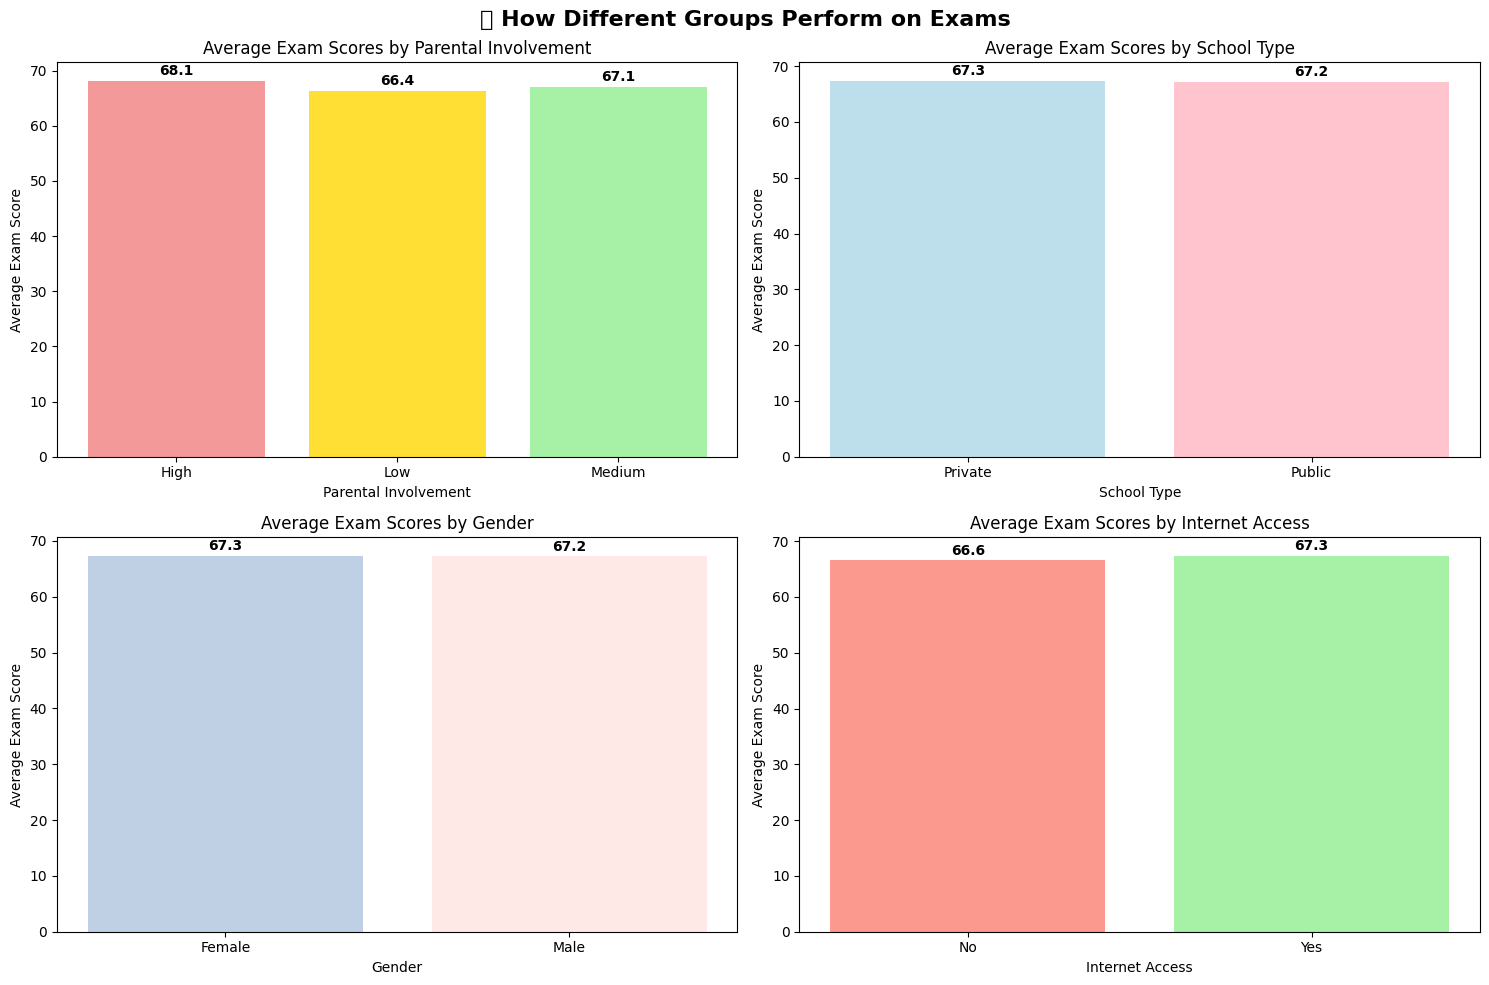

💡 Key Group Differences:
   • Parental_Involvement: High students score 1.7 points higher than Low
   • School_Type: Private students score 0.1 points higher than Public
   • Gender: Female students score 0.0 points higher than Male
   • Internet_Access: Yes students score 0.8 points higher than No


In [ ]:
# Step 7: Look at Categorical Factors (Groups)
print("👥 STEP 7: COMPARING DIFFERENT GROUPS")
print("-" * 40)

# Analyze categorical factors
categorical_factors = ['Parental_Involvement', 'School_Type', 'Gender', 'Internet_Access']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 How Different Groups Perform on Exams', fontsize=16, fontweight='bold')

positions = [(0,0), (0,1), (1,0), (1,1)]
colors = [['lightcoral', 'gold', 'lightgreen'], ['lightblue', 'lightpink'],
          ['lightsteelblue', 'mistyrose'], ['salmon', 'lightgreen']]

for i, factor in enumerate(categorical_factors):
    if factor in df.columns:
        row, col = positions[i]

        # Calculate average scores for each group
        group_data = df.groupby(factor)['Exam_Score'].agg(['mean', 'count']).reset_index()

        # Create bar plot
        bars = axes[row, col].bar(group_data[factor], group_data['mean'],
                                 color=colors[i], alpha=0.8)
        axes[row, col].set_title(f'Average Exam Scores by {factor.replace("_", " ")}')
        axes[row, col].set_xlabel(factor.replace('_', ' ').title())
        axes[row, col].set_ylabel('Average Exam Score')

        # Add value labels on bars
        for bar, value in zip(bars, group_data['mean']):
            axes[row, col].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                               f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print key insights
print(f"💡 Key Group Differences:")
for factor in categorical_factors:
    if factor in df.columns:
        group_stats = df.groupby(factor)['Exam_Score'].mean()
        max_group = group_stats.idxmax()
        min_group = group_stats.idxmin()
        difference = group_stats.max() - group_stats.min()
        print(f"   • {factor}: {max_group} students score {difference:.1f} points higher than {min_group}")

📚 STEP 8: STUDY HABITS ANALYSIS
-----------------------------------
📊 STUDY HOURS vs EXAM PERFORMANCE:
----------------------------------------
   • Low (0-10h)    : 64.0 points (±4.0) - 349 students
   • Medium (10-20h): 66.2 points (±3.5) - 3075 students
   • High (20-30h)  : 68.5 points (±3.6) - 2710 students
   • Very High (30h+): 71.0 points (±3.4) - 244 students


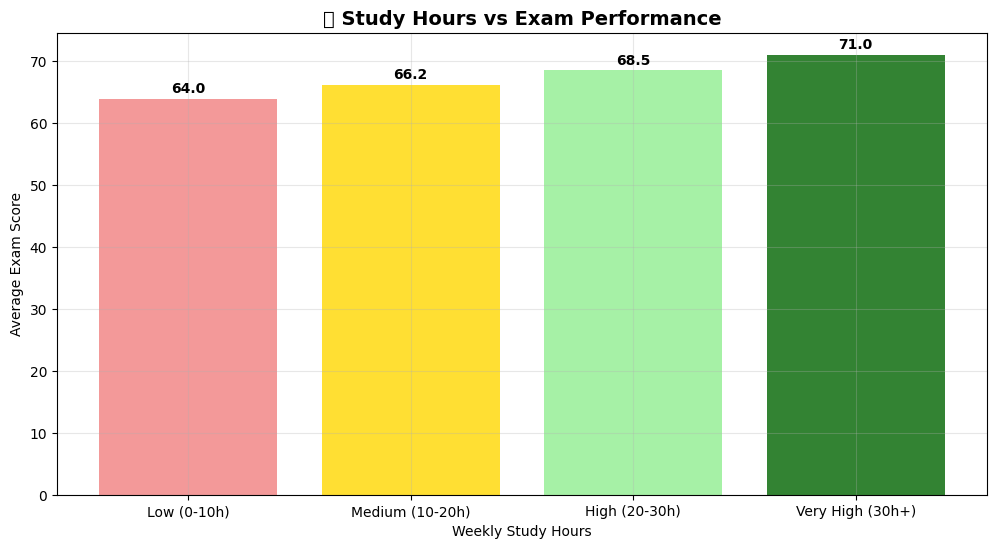

💡 Study Habits Insight:
   • Students who study 30+ hours score 7.1 points higher!
   • That's like going from a 64 to a 71!


In [ ]:
# Step 8: Study Habits Deep Dive
print("📚 STEP 8: STUDY HABITS ANALYSIS")
print("-" * 35)

# Create study hour categories
df['Study_Category'] = pd.cut(df['Hours_Studied'],
                             bins=[0, 10, 20, 30, 50],
                             labels=['Low (0-10h)', 'Medium (10-20h)', 'High (20-30h)', 'Very High (30h+)'])

study_analysis = df.groupby('Study_Category')['Exam_Score'].agg(['mean', 'count', 'std']).reset_index()

print("📊 STUDY HOURS vs EXAM PERFORMANCE:")
print("-" * 40)
for _, row in study_analysis.iterrows():
    print(f"   • {row['Study_Category']:<15}: {row['mean']:.1f} points (±{row['std']:.1f}) - {row['count']} students")

# Visualize study habits impact
plt.figure(figsize=(12, 6))
bars = plt.bar(study_analysis['Study_Category'], study_analysis['mean'],
               color=['lightcoral', 'gold', 'lightgreen', 'darkgreen'], alpha=0.8)
plt.title('📚 Study Hours vs Exam Performance', fontsize=14, fontweight='bold')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Exam Score')

# Add value labels
for bar, value in zip(bars, study_analysis['mean']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.show()

# Calculate improvement
low_score = study_analysis[study_analysis['Study_Category'] == 'Low (0-10h)']['mean'].iloc[0]
high_score = study_analysis[study_analysis['Study_Category'] == 'Very High (30h+)']['mean'].iloc[0]
improvement = high_score - low_score

print(f"💡 Study Habits Insight:")
print(f"   • Students who study 30+ hours score {improvement:.1f} points higher!")
print(f"   • That's like going from a {low_score:.0f} to a {high_score:.0f}!")

🌡️ STEP 9: CORRELATION HEATMAP
-----------------------------------


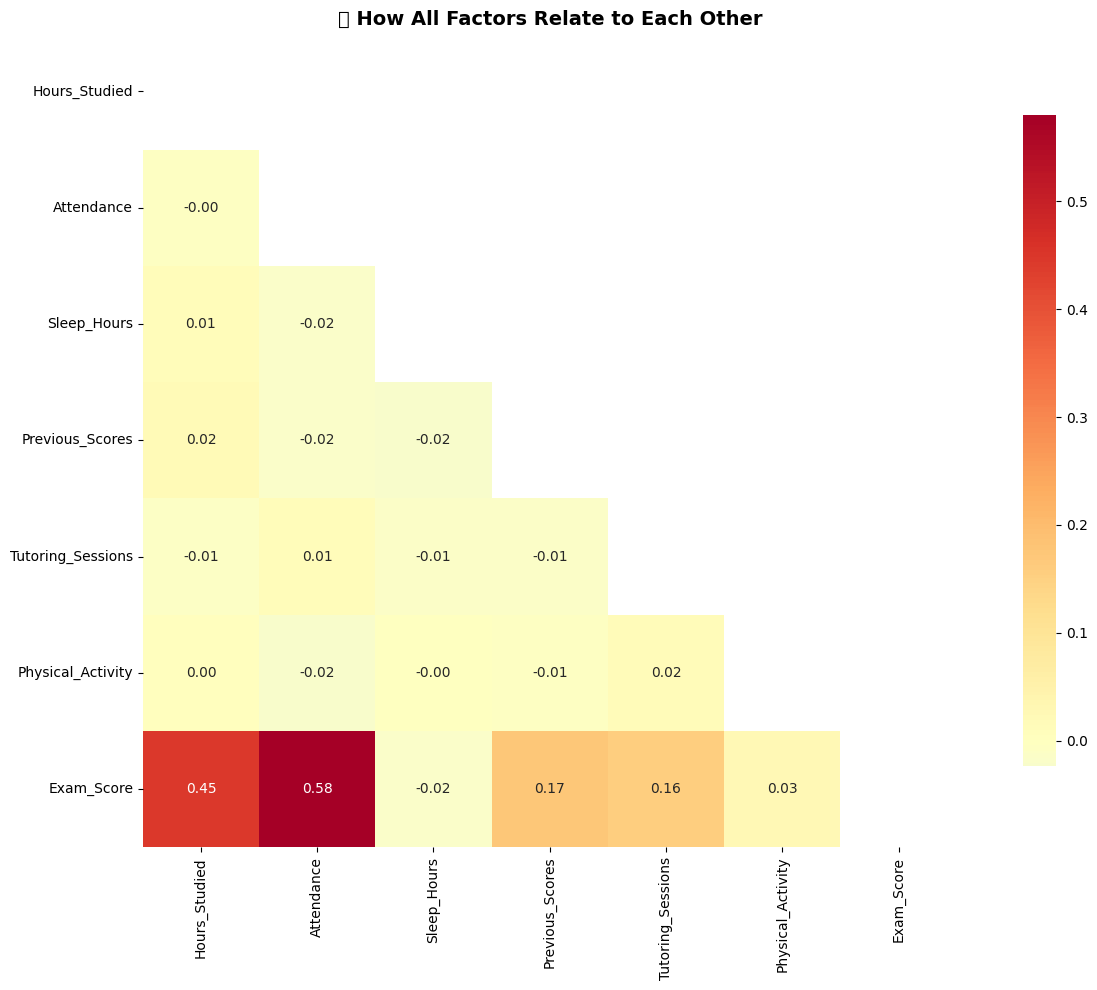

💡 How to read this heatmap:
   • Red colors = negative relationship (one goes up, other goes down)
   • Blue colors = positive relationship (both go up together)
   • Darker colors = stronger relationships
   • Look at the 'Exam_Score' row to see what affects grades most!


In [ ]:
# Step 9: Create a Correlation Heatmap (Visual Summary)
print("🌡️ STEP 9: CORRELATION HEATMAP")
print("-" * 35)

# Create correlation matrix for numeric variables
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Show only lower triangle

sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('🌡️ How All Factors Relate to Each Other', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"💡 How to read this heatmap:")
print(f"   • Red colors = negative relationship (one goes up, other goes down)")
print(f"   • Blue colors = positive relationship (both go up together)")
print(f"   • Darker colors = stronger relationships")
print(f"   • Look at the 'Exam_Score' row to see what affects grades most!")

In [11]:
# Step 10: Summary and Key Findings
print("🎯 STEP 10: KEY FINDINGS SUMMARY")
print("=" * 45)

# Get top 3 predictors
top_3 = correlations.drop('Exam_Score').head(3)

print("🏆 TOP 3 SUCCESS FACTORS:")
for i, (factor, corr) in enumerate(top_3.items(), 1):
    print(f"   {i}. {factor.replace('_', ' ').title()}: {corr:.3f} correlation")

print(f"\n📚 STUDY HABITS IMPACT:")
print(f"   • High study hours (30+) vs Low (0-10): +{improvement:.1f} points")

print(f"\n👨‍👩‍👧‍👦 FAMILY FACTORS:")
if 'Parental_Involvement' in df.columns:
    parental_impact = df.groupby('Parental_Involvement')['Exam_Score'].mean()
    impact_diff = parental_impact.max() - parental_impact.min()
    print(f"   • High vs Low parental involvement: +{impact_diff:.1f} points")

print(f"\n🎓 SCHOOL FACTORS:")
if 'School_Type' in df.columns:
    school_impact = df.groupby('School_Type')['Exam_Score'].mean()
    school_diff = abs(school_impact.diff().dropna().iloc[0])
    print(f"   • School type difference: {school_diff:.1f} points")

print(f"\n💡 PRACTICAL RECOMMENDATIONS:")
print(f"   1. Study at least 20+ hours per week")
print(f"   2. Maintain high attendance (90%+)")
print(f"   3. Get family involved in education")
print(f"   4. Ensure adequate sleep (7-9 hours)")
print(f"   5. Consider tutoring if struggling")

print(f"\n✅ EDA COMPLETE!")
print(f"   • Analyzed {df.shape[0]:,} students")
print(f"   • Examined {df.shape[1]} factors")
print(f"   • Found clear patterns for success!")

🎯 STEP 10: KEY FINDINGS SUMMARY
🏆 TOP 3 SUCCESS FACTORS:
   1. Attendance: 0.580 correlation
   2. Hours Studied: 0.445 correlation
   3. Previous Scores: 0.174 correlation

📚 STUDY HABITS IMPACT:
   • High study hours (30+) vs Low (0-10): +7.1 points

👨‍👩‍👧‍👦 FAMILY FACTORS:
   • High vs Low parental involvement: +1.7 points

🎓 SCHOOL FACTORS:
   • School type difference: 0.1 points

💡 PRACTICAL RECOMMENDATIONS:
   1. Study at least 20+ hours per week
   2. Maintain high attendance (90%+)
   3. Get family involved in education
   4. Ensure adequate sleep (7-9 hours)
   5. Consider tutoring if struggling

✅ EDA COMPLETE!
   • Analyzed 6,378 students
   • Examined 21 factors
   • Found clear patterns for success!
